# Building a Handwritten Digits Classifier
## Introduction
In this Project, we'll build models that can classify handwritten digits using a K-Nearest Neighbors model and a Neural Network. The dataset that we will use is a pre-loaded dataset in Scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

warnings.simplefilter(action='ignore')
%matplotlib inline

In [3]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
target = pd.Series(data['target'])
data = pd.DataFrame(data['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


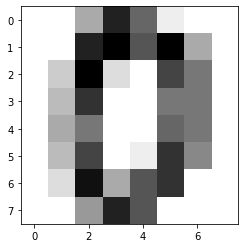

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8, 8)
plt.imshow(np_image, cmap='gray_r')

What the images in the dataset appear like when reduced down to 8 by 8 pixels.

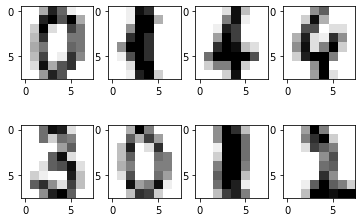

In [6]:
f, ax = plt.subplots(2,4)
for a in range(4):
    ax[0,a].imshow(features.iloc[0+99*a].values.reshape(8,8), cmap='gray_r')
for a in range(4):
    ax[1,a].imshow(features.iloc[999+100*a].values.reshape(8,8), cmap='gray_r')

The above images are actually fairly easily recognizable to people, the hard part is getting the computer to recognize them.

## K-Nearest Neighbors

In [15]:
def train_knn(neighbors, train_features, train_target):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(train_features, train_target)
    return knn

def test(model, test_features, test_target):
    pred = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_target
    train_test_df['predicted_label'] = pred
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=42)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_knn(k, train_features, train_target)
        overall_accuracy = test(model, test_features, test_target)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [16]:
k_values = list(range(1,11))
k_accuracies = []

for k in k_values:
    k_accuracy = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracy)
    k_accuracies.append(k_mean_accuracy)

Text(0.5, 1.0, 'Mean accuracy Vs. K')

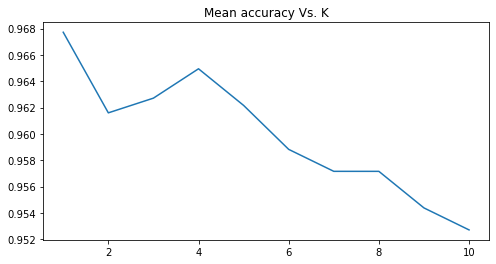

In [17]:
plt.figure(figsize=(8,4))
plt.plot(k_values, k_accuracies)
plt.title("Mean accuracy Vs. K")

The accuracy of the model decrease with each new neighbor, there is a spike at 4 neighbors but still they are a bit lower than the accuracy with only one neighbor. The loss of accuracy isn't dramatic with a loss of only 0.006 points.

## Neural Network with one hidden layer

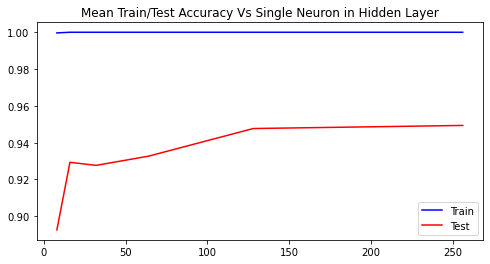

In [22]:
neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
  
]

mean_train_acc = []
mean_test_acc = []

for n in neurons:
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=42)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = target.iloc[train_index], target.iloc[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=1000)
        mlp.fit(train_features, train_target)
        
        #Train Accuracy
        pred = mlp.predict(train_features)
        train_acc = accuracy_score(train_target, pred)
        train_accuracies.append(train_acc)
        
        #Test Accuracy
        pred = mlp.predict(test_features)
        test_acc = accuracy_score(test_target, pred)
        test_accuracies.append(test_acc)
    
    mean_train_acc.append(np.mean(train_accuracies))
    mean_test_acc.append(np.mean(test_accuracies))



plt.figure(figsize=(8,4))
plt.title("Mean Train/Test Accuracy Vs Single Neuron in Hidden Layer")
x = [i[0] for i in neurons]
plt.plot(x, mean_train_acc, color='blue')
plt.plot(x, mean_test_acc, color='red')
plt.legend(['Train', 'Test'])

The accuracy in the train portion hits 1 rapidly, meanwhile the test accuracy starts to increase with each neuron and we increase the accuracy from 0.85 (approx) to 0.96. The K-Nearest neighbors model got an accuracy of 0.96, wich means that there's an advantage to use a neural network to classify this dataset.

The only problem so far is that we don't have any information about true or false positives and true or false negatives.

## Neural Network with two hidden layers

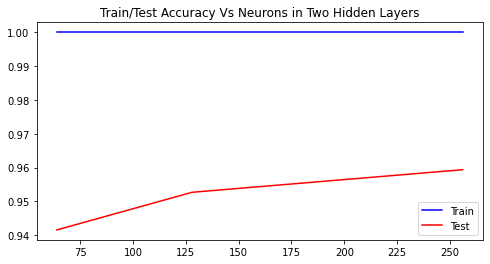

In [24]:
neurons = [
    (64, 64),
    (128, 128),
    (256, 256)
]

mean_train_acc = []
mean_test_acc = []

for n in neurons:
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=42)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = target.iloc[train_index], target.iloc[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=1000)
        mlp.fit(train_features, train_target)
        
        #Train Accuracy
        pred = mlp.predict(train_features)
        train_acc = accuracy_score(train_target, pred)
        train_accuracies.append(train_acc)
        
        #Test Accuracy
        pred = mlp.predict(test_features)
        test_acc = accuracy_score(test_target, pred)
        test_accuracies.append(test_acc)
    
    mean_train_acc.append(np.mean(train_accuracies))
    mean_test_acc.append(np.mean(test_accuracies))
        
        
plt.figure(figsize=(8,4))
plt.title("Train/Test Accuracy Vs Neurons in Two Hidden Layers")
x = [i[0] for i in neurons]
plt.plot(x, mean_train_acc, color='blue')
plt.plot(x, mean_test_acc, color='red')
plt.legend(['Train', 'Test'])

With two hidden layers, the model gets an accuracy of 1 in the train portion with the first set of 64 neurons. Meanwhile the test portion increases from 0.94 to 0.95 wich is still a lower accuracy than K-Nearest Neighbors

## Neural Network with three hidden layers

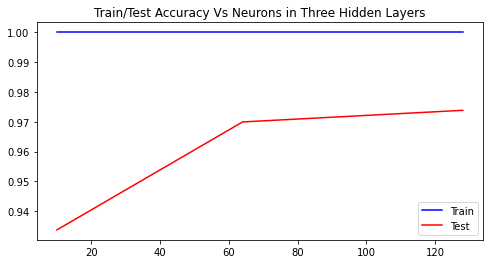

In [25]:
neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

mean_train_acc = []
mean_test_acc = []

for n in neurons:
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=42, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = target.iloc[train_index], target.iloc[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=1000)
        mlp.fit(train_features, train_target)
        
        #Train Accuracy
        pred = mlp.predict(train_features)
        train_acc = accuracy_score(train_target, pred)
        train_accuracies.append(train_acc)
        
        #Test Accuracy
        pred = mlp.predict(test_features)
        test_acc = accuracy_score(test_target, pred)
        test_accuracies.append(test_acc)
    
    mean_train_acc.append(np.mean(train_accuracies))
    mean_test_acc.append(np.mean(test_accuracies))
        
        
plt.figure(figsize=(8,4))
plt.title("Train/Test Accuracy Vs Neurons in Three Hidden Layers")
x = [i[0] for i in neurons]
plt.plot(x, mean_train_acc, color='blue')
plt.plot(x, mean_test_acc, color='red')
plt.legend(['Train', 'Test'])

## Conclusion
With three hidden layers the accuracy in the test portion increases from 0.94 to 0.975 approximately. This has a better accuracy than K-Nearest Neighbors.